In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path='data/6270000_대구광역시_01_01_01_P_병원.xlsx'
df = pd.read_excel(file_path)

In [3]:
hs=df.copy()

In [4]:
df = df[['사업장명', '업태구분명', '상세영업상태명', '도로명전체주소']]
df.head()

,사업장명,업태구분명,상세영업상태명,도로명전체주소
0,대구효도요양병원,요양병원(일반요양병원),직권폐업,대구광역시 중구 달구벌대로 1929 (대신동)
1,광개토병원,병원,영업중,"대구광역시 중구 중앙대로 366, 지하1,1,2,3,5,7,11,12,14,17층 ..."
2,닥터굿재활의학과병원,병원,폐업,대구광역시 중구 국채보상로 582 (남일동)
3,동서치과병원,치과병원,폐업,대구광역시 중구 동성로1길 77 (삼덕동1가)
4,명진치과병원,치과병원,폐업,NaN


In [5]:
df = df[df.상세영업상태명.isin(['영업중'])]
df.head()

,사업장명,업태구분명,상세영업상태명,도로명전체주소
1,광개토병원,병원,영업중,"대구광역시 중구 중앙대로 366, 지하1,1,2,3,5,7,11,12,14,17층 ..."
14,MS재건병원,병원,영업중,"대구광역시 중구 동덕로 194 (동인동1가, 동화빌딩)"
15,계명대학교대구동산병원,종합병원,영업중,"대구광역시 중구 달성로 56, 계명대학교대구동산병원 (동산동)"
16,유니온병원,병원,영업중,대구광역시 중구 동덕로 197 (동인동1가)
17,미르치과병원,치과병원,영업중,대구광역시 중구 공평로 12 (삼덕동2가)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 304
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사업장명     214 non-null    object
 1   업태구분명    214 non-null    object
 2   상세영업상태명  214 non-null    object
 3   도로명전체주소  214 non-null    object
dtypes: object(4)
memory usage: 8.4+ KB


In [7]:
# 널값이 있을때 하자
# df=df.dropna()
# df.info()

In [8]:
df=df[df.업태구분명.isin(['병원', '종합병원', '치과병원'])]
df.head()

,사업장명,업태구분명,상세영업상태명,도로명전체주소
1,광개토병원,병원,영업중,"대구광역시 중구 중앙대로 366, 지하1,1,2,3,5,7,11,12,14,17층 ..."
14,MS재건병원,병원,영업중,"대구광역시 중구 동덕로 194 (동인동1가, 동화빌딩)"
15,계명대학교대구동산병원,종합병원,영업중,"대구광역시 중구 달성로 56, 계명대학교대구동산병원 (동산동)"
16,유니온병원,병원,영업중,대구광역시 중구 동덕로 197 (동인동1가)
17,미르치과병원,치과병원,영업중,대구광역시 중구 공평로 12 (삼덕동2가)


In [9]:
df[['시도', '구', '도로', '나머지']]=df['도로명전체주소'].str.split(' ', n=3, expand=True)
df.head()

,사업장명,업태구분명,상세영업상태명,도로명전체주소,시도,구,도로,나머지
1,광개토병원,병원,영업중,"대구광역시 중구 중앙대로 366, 지하1,1,2,3,5,7,11,12,14,17층 ...",대구광역시,중구,중앙대로,"366, 지하1,1,2,3,5,7,11,12,14,17층 (덕산동)"
14,MS재건병원,병원,영업중,"대구광역시 중구 동덕로 194 (동인동1가, 동화빌딩)",대구광역시,중구,동덕로,"194 (동인동1가, 동화빌딩)"
15,계명대학교대구동산병원,종합병원,영업중,"대구광역시 중구 달성로 56, 계명대학교대구동산병원 (동산동)",대구광역시,중구,달성로,"56, 계명대학교대구동산병원 (동산동)"
16,유니온병원,병원,영업중,대구광역시 중구 동덕로 197 (동인동1가),대구광역시,중구,동덕로,197 (동인동1가)
17,미르치과병원,치과병원,영업중,대구광역시 중구 공평로 12 (삼덕동2가),대구광역시,중구,공평로,12 (삼덕동2가)


In [10]:
df=df.drop(['도로명전체주소', '시도', '도로', '나머지'], axis=1)
df.head()

,사업장명,업태구분명,상세영업상태명,구
1,광개토병원,병원,영업중,중구
14,MS재건병원,병원,영업중,중구
15,계명대학교대구동산병원,종합병원,영업중,중구
16,유니온병원,병원,영업중,중구
17,미르치과병원,치과병원,영업중,중구


In [11]:
df['count']=1
df.head()

,사업장명,업태구분명,상세영업상태명,구,count
1,광개토병원,병원,영업중,중구,1
14,MS재건병원,병원,영업중,중구,1
15,계명대학교대구동산병원,종합병원,영업중,중구,1
16,유니온병원,병원,영업중,중구,1
17,미르치과병원,치과병원,영업중,중구,1


In [12]:
hsgu=df['count'].groupby([df['구'], df['업태구분명']]).sum()
hsgu

구    업태구분명
남구   병원        7
     종합병원      3
달서구  병원       31
     종합병원      6
     치과병원      5
달성군  병원        7
동구   병원        9
     종합병원      1
북구   병원       20
     종합병원      2
     치과병원      2
서구   병원        8
     종합병원      1
수성구  병원       15
     종합병원      1
     치과병원      5
중구   병원       11
     종합병원      3
     치과병원      4
Name: count, dtype: int64

In [13]:
file_path='data/6270000_대구광역시_01_01_02_P_의원.xlsx'
df2 = pd.read_excel(file_path)

In [14]:
cl=df2.copy()

In [15]:
df2 = df2[['사업장명', '업태구분명', '상세영업상태명', '도로명전체주소']]
df2.head()

,사업장명,업태구분명,상세영업상태명,도로명전체주소
0,닥터오성형외과의원,의원,영업중,대구광역시 중구 동성로6길 2-19 (삼덕동1가)
1,뷰티라인치과의원,치과의원,영업중,대구광역시 중구 달구벌대로 2078 (남산동)
2,봄바람한의원,한의원,영업중,대구광역시 중구 명륜로 129 (봉산동)
3,센트로꿈을심는연합치과의원,치과의원,영업중,대구광역시 중구 동덕로 91 (대봉동)
4,명진치과의원,치과의원,영업중,대구광역시 중구 중앙대로 354 (남산동)


In [16]:
df2 = df2[df2.상세영업상태명.isin(['영업중'])]
df2.head()

,사업장명,업태구분명,상세영업상태명,도로명전체주소
0,닥터오성형외과의원,의원,영업중,대구광역시 중구 동성로6길 2-19 (삼덕동1가)
1,뷰티라인치과의원,치과의원,영업중,대구광역시 중구 달구벌대로 2078 (남산동)
2,봄바람한의원,한의원,영업중,대구광역시 중구 명륜로 129 (봉산동)
3,센트로꿈을심는연합치과의원,치과의원,영업중,대구광역시 중구 동덕로 91 (대봉동)
4,명진치과의원,치과의원,영업중,대구광역시 중구 중앙대로 354 (남산동)


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3611 entries, 0 to 4790
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사업장명     3611 non-null   object
 1   업태구분명    3611 non-null   object
 2   상세영업상태명  3611 non-null   object
 3   도로명전체주소  3610 non-null   object
dtypes: object(4)
memory usage: 141.1+ KB


In [18]:
df2=df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3610 entries, 0 to 4790
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사업장명     3610 non-null   object
 1   업태구분명    3610 non-null   object
 2   상세영업상태명  3610 non-null   object
 3   도로명전체주소  3610 non-null   object
dtypes: object(4)
memory usage: 141.0+ KB


In [19]:
df2=df2[df2.업태구분명.isin(['의원', '치과의원'])]
df2.head()

,사업장명,업태구분명,상세영업상태명,도로명전체주소
0,닥터오성형외과의원,의원,영업중,대구광역시 중구 동성로6길 2-19 (삼덕동1가)
1,뷰티라인치과의원,치과의원,영업중,대구광역시 중구 달구벌대로 2078 (남산동)
3,센트로꿈을심는연합치과의원,치과의원,영업중,대구광역시 중구 동덕로 91 (대봉동)
4,명진치과의원,치과의원,영업중,대구광역시 중구 중앙대로 354 (남산동)
5,동성로행복을심는치과의원,치과의원,영업중,대구광역시 중구 국채보상로 622 (공평동)


In [20]:
df2[['시도', '구', '도로', '나머지']]=df2['도로명전체주소'].str.split(' ', n=3, expand=True)
df2.head()

,사업장명,업태구분명,상세영업상태명,도로명전체주소,시도,구,도로,나머지
0,닥터오성형외과의원,의원,영업중,대구광역시 중구 동성로6길 2-19 (삼덕동1가),대구광역시,중구,동성로6길,2-19 (삼덕동1가)
1,뷰티라인치과의원,치과의원,영업중,대구광역시 중구 달구벌대로 2078 (남산동),대구광역시,중구,달구벌대로,2078 (남산동)
3,센트로꿈을심는연합치과의원,치과의원,영업중,대구광역시 중구 동덕로 91 (대봉동),대구광역시,중구,동덕로,91 (대봉동)
4,명진치과의원,치과의원,영업중,대구광역시 중구 중앙대로 354 (남산동),대구광역시,중구,중앙대로,354 (남산동)
5,동성로행복을심는치과의원,치과의원,영업중,대구광역시 중구 국채보상로 622 (공평동),대구광역시,중구,국채보상로,622 (공평동)


In [21]:
df2=df2.drop(['도로명전체주소', '시도', '도로', '나머지'], axis=1)
df2.head()

,사업장명,업태구분명,상세영업상태명,구
0,닥터오성형외과의원,의원,영업중,중구
1,뷰티라인치과의원,치과의원,영업중,중구
3,센트로꿈을심는연합치과의원,치과의원,영업중,중구
4,명진치과의원,치과의원,영업중,중구
5,동성로행복을심는치과의원,치과의원,영업중,중구


In [22]:
df2['count']=1
df2.head()

,사업장명,업태구분명,상세영업상태명,구,count
0,닥터오성형외과의원,의원,영업중,중구,1
1,뷰티라인치과의원,치과의원,영업중,중구,1
3,센트로꿈을심는연합치과의원,치과의원,영업중,중구,1
4,명진치과의원,치과의원,영업중,중구,1
5,동성로행복을심는치과의원,치과의원,영업중,중구,1


In [23]:
clgu=df2['count'].groupby([df2['구'], df2['업태구분명']]).sum()
clgu

구    업태구분명
남구   의원       105
     치과의원      57
달서구  의원       380
     치과의원     198
달성군  의원       123
     치과의원      61
대천로  의원         1
동구   의원       238
     치과의원     104
북구   의원       253
     치과의원     143
서구   의원       119
     치과의원      51
수성구  의원       350
     치과의원     163
중구   의원       257
     치과의원     108
Name: count, dtype: int64

In [24]:
file_path='data/2019.06.30.기준 대구광역시 주민등록인구 현황_UTF8.csv'
df3 = pd.read_csv(file_path,thousands = ',')

In [25]:
pop=df3.copy()

In [26]:
drop_list = []
check_list = ['총계', '행정구역', ' 남', ' 여'] # 남구 삭제 방지를 위해 '남' 앞에 공백 추가 
for chk in check_list:
    for item in df3.columns :
        if  chk in item:
            drop_list.append(item)
drop_list = list(set(drop_list)) #  중복 제거를 위해 set을 사용

In [27]:
df3 = df3.drop(drop_list, axis=1)
df3.head()

,중구 계,동구 계,서구 계,남구 계,북구 계,수성구 계,달서구 계,달성군 계
0,456,2019,559,532,2523,1565,2771,2660
1,524,2401,688,598,2954,1964,3370,2885
2,588,2718,852,675,3386,2387,3836,3138
3,625,2947,947,742,3717,2839,4480,3362
4,628,3103,885,722,3853,3069,4710,3260


In [28]:
df3.columns = df3.columns.str.replace(" 계","")
df3.head()

,중구,동구,서구,남구,북구,수성구,달서구,달성군
0,456,2019,559,532,2523,1565,2771,2660
1,524,2401,688,598,2954,1964,3370,2885
2,588,2718,852,675,3386,2387,3836,3138
3,625,2947,947,742,3717,2839,4480,3362
4,628,3103,885,722,3853,3069,4710,3260


In [29]:
popgu=df3.sum()
popgu

중구      77935
동구     348825
서구     179920
남구     148682
북구     439093
수성구    430481
달서구    571303
달성군    254239
dtype: int64

In [56]:
popgu=pd.DataFrame(popgu)
popgu

,0
중구,77935
동구,348825
서구,179920
남구,148682
북구,439093
수성구,430481
달서구,571303
달성군,254239


In [60]:
popgu['구']=popgu.index
popgu

,0,구
중구,77935,중구
동구,348825,동구
서구,179920,서구
남구,148682,남구
북구,439093,북구
수성구,430481,수성구
달서구,571303,달서구
달성군,254239,달성군


In [85]:
popgu=popgu.rename({0:'인구'},axis='columns')
popgu

,인구,구
중구,77935,중구
동구,348825,동구
서구,179920,서구
남구,148682,남구
북구,439093,북구
수성구,430481,수성구
달서구,571303,달서구
달성군,254239,달성군


In [86]:
hscl=pd.concat([df,df2])
hscl.head()

,사업장명,업태구분명,상세영업상태명,구,count
1,광개토병원,병원,영업중,중구,1
14,MS재건병원,병원,영업중,중구,1
15,계명대학교대구동산병원,종합병원,영업중,중구,1
16,유니온병원,병원,영업중,중구,1
17,미르치과병원,치과병원,영업중,중구,1


In [87]:
total=pd.merge(hscl,popgu, on='구')
total.head()

,사업장명,업태구분명,상세영업상태명,구,count,인구
0,광개토병원,병원,영업중,중구,1,77935
1,MS재건병원,병원,영업중,중구,1,77935
2,계명대학교대구동산병원,종합병원,영업중,중구,1,77935
3,유니온병원,병원,영업중,중구,1,77935
4,미르치과병원,치과병원,영업중,중구,1,77935


In [88]:
ged=total['count'].groupby([total['구'],total['업태구분명']]).sum()
ged.head()

구    업태구분명
남구   병원         7
     의원       105
     종합병원       3
     치과의원      57
달서구  병원        31
Name: count, dtype: int64

In [89]:
ged1=total.groupby(['구','업태구분명']).size()
ged1=pd.DataFrame(ged1)
ged1.head()

0
구   업태구분명     
남구  병원       7
    의원     105
    종합병원     3
    치과의원    57
달서구 병원      31

In [90]:
ged2=total.groupby(['구','업태구분명']).agg({'count': np.sum, '인구': np.mean})
ged2.head()

count      인구
구   업태구분명               
남구  병원         7  148682
    의원       105  148682
    종합병원       3  148682
    치과의원      57  148682
달서구 병원        31  571303

In [91]:
def totalpop(d):
    return pd.DataFrame({'구별': d['count'].sum(),\
    '천명당':round(d['count'].sum()/d.인구.mean()*1000,2)}, index=[''])
ged3=total.groupby(['구','업태구분명']).apply(totalpop)
ged3.head(10)

구별   천명당
구   업태구분명            
남구  병원        7  0.05
    의원      105  0.71
    종합병원      3  0.02
    치과의원     57  0.38
달서구 병원       31  0.05
    의원      380  0.67
    종합병원      6  0.01
    치과병원      5  0.01
    치과의원    198  0.35
달성군 병원        7  0.03

In [92]:
ged4=ged.unstack()
ged4

업태구분명,병원,의원,종합병원,치과병원,치과의원
구,,,,,
남구,7.0,105.0,3.0,NaN,57.0
달서구,31.0,380.0,6.0,5.0,198.0
달성군,7.0,123.0,NaN,NaN,61.0
동구,9.0,238.0,1.0,NaN,104.0
북구,20.0,253.0,2.0,2.0,143.0
서구,8.0,119.0,1.0,NaN,51.0
수성구,15.0,350.0,1.0,5.0,163.0
중구,11.0,257.0,3.0,4.0,108.0


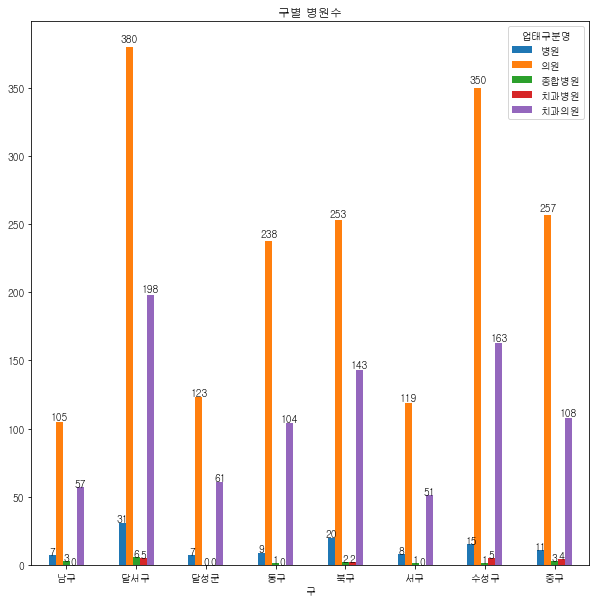

In [93]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/NGULIM.TTF'
font_family = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_family
# 위코드는 한글지원 폰트 설정

ax=ged4.plot.bar(rot=0, figsize=(10,10))
plt.title("구별 병원수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%d"%height, (left+width/2, height*1.01), ha='center')

plt.show()